In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/andrewpenland/OceanProtocol-Rounds-Data/main/ocean-votes-round-1-to-10.csv'
df = pd.read_csv(data_url, index_col=0)
df.head()

,address,balance,Vote,Round,Project Name,Proposal State,Grant Category,Earmarks,OCEAN Granted
0,0x9e95B6c35a43A61B06F19d21FBe008f17B1f5e44,300.011809,Yes,1,Wisdom Of the Web,Not Granted,Build & Integrate,General,0.0
1,0x01e66950353400E93AEe7F041C0303103E2ef5Ab,5271.992999,Yes,1,Operation Plankton,Not Granted,Outreach,General,0.0
2,0x362CfE20851584DF00a670b2c8460A3aafD35839,3268.114915,Yes,1,Operation Plankton,Not Granted,Outreach,General,0.0
3,0x1Daf0b27e0F54a235abb5D52D276033394Eb8F49,567.687949,Yes,1,Ocean Academy,Funded,Outreach,General,13000.0
4,0xcC7E9b8331bea863a158589E8EBCF118C72d0683,7084.813123,Yes,1,Ocean Academy,Funded,Outreach,General,13000.0


In [29]:
data_url2 = 'https://raw.githubusercontent.com/Crypto-Phil/ocean_rewards/main/export-tokenholders-for-contract-0x967da4048cD07aB37855c090aAF366e4ce1b9F48.csv'
df2 = pd.read_csv(data_url2)
print(df2.shape)
df2.head()

(33054, 3)


,HolderAddress,Balance,PendingBalanceUpdate
0,0x7df5273ad9a6fcce64d45c64c1e43cfb6f861725,1.864205e-04,No
1,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,8.245614e+06,No
2,0x8aa8c6b8897665d62d03e4c6dfc823142a4b44d8,2.000000e-03,No
3,0x3155674fccb839d6c229dbcc8463ccc32cb36710,2.838473e+06,No
4,0x31ba114e64d5c3c9b9123a3a19771b65c820a811,5.268272e+06,No


In [30]:
df2.sort_values('Balance', ascending=False).head()

,HolderAddress,Balance,PendingBalanceUpdate
26689,0xd5e6219a79c5cc61b9074331d1b05a6f35c5a48a,9.429978e+07,No
19500,0xf977814e90da44bfa03b6295a0616a897441acec,4.625952e+07,No
9917,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,3.357751e+07,No
18771,0x53ab4a93b31f480d17d3440a6329bda86869458a,3.255219e+07,No
26100,0x0fa9e77f7c2bd1c15ad18a97271f3d5181d686bf,2.350000e+07,No


In [28]:
circulating_supply = df2['Balance'].sum() - 94299780
total_votes = df[['Round', 'balance']].groupby('Round').sum().reset_index()
total_votes['fraction'] = total_votes['balance'] / circulating_supply
total_votes

,Round,balance,fraction
0,1,3.257733e+06,0.006279
1,2,1.195649e+06,0.002305
2,3,3.712733e+06,0.007156
3,4,3.060886e+06,0.005900
4,5,1.168502e+07,0.022523
5,6,1.117569e+07,0.021541
6,7,2.179240e+07,0.042005
7,8,2.141962e+07,0.041286
8,9,1.730843e+07,0.033362
9,10,1.684062e+08,0.324601


<AxesSubplot:>

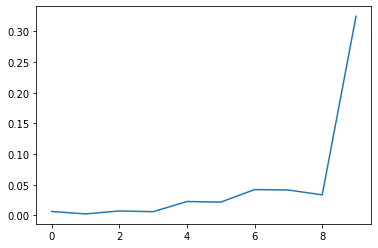

In [26]:
total_votes['fraction'].plot()

In [3]:
df['is_funded'] = df['OCEAN Granted'] > 0

<AxesSubplot:xlabel='Round', ylabel='balance'>

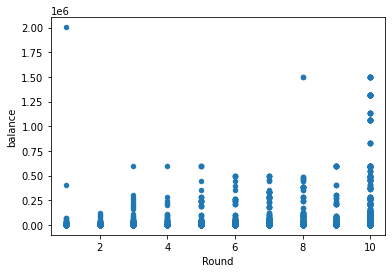

In [4]:
# votes cast per address
df.plot.scatter('Round', 'balance')

<AxesSubplot:xlabel='Round', ylabel='OCEAN Granted'>

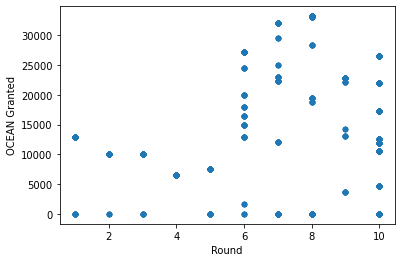

In [14]:
# ocean received per project
df.plot.scatter('Round', 'OCEAN Granted')

In [5]:
df.groupby('Round').apply(lambda x: pd.Series(dict(
    total_votes = sum(x['balance']), 
    total_grants = sum(x.groupby('Project Name').max()['OCEAN Granted']),
    
)))

,total_votes,total_grants
Round,,
1,3.257733e+06,65000.0
2,1.195649e+06,90000.0
3,3.712733e+06,120000.0
4,3.060886e+06,91000.0
5,1.168502e+07,112500.0
6,1.117569e+07,272000.0
7,2.179240e+07,400000.0
8,2.141962e+07,365244.0
9,1.730843e+07,349001.0


In [6]:
df1 = df[['address', 'balance', 'Round']].groupby(['address', 'Round']).sum('balance').sort_values('balance').reset_index()

In [7]:
df2 = df1.groupby('address').mean('balance').reset_index()

In [8]:
df2['balance'].describe()

count    3.960000e+02
mean     3.395815e+05
std      1.756710e+06
min      1.026050e-02
25%      1.200928e+03
50%      1.000032e+04
75%      6.942072e+04
max      2.898808e+07
Name: balance, dtype: float64

In [9]:
whale_threshold = df2['balance'].quantile(0.95)

In [10]:
df2['is_whale'] = df2['balance'] > whale_threshold
df = df.merge(df2[['address', 'is_whale']])
df.head()

,address,balance,Vote,Round,Project Name,Proposal State,Grant Category,Earmarks,OCEAN Granted,is_funded,is_whale
0,0x9e95B6c35a43A61B06F19d21FBe008f17B1f5e44,300.011809,Yes,1,Wisdom Of the Web,Not Granted,Build & Integrate,General,0.0,False,False
1,0x01e66950353400E93AEe7F041C0303103E2ef5Ab,5271.992999,Yes,1,Operation Plankton,Not Granted,Outreach,General,0.0,False,False
2,0x01e66950353400E93AEe7F041C0303103E2ef5Ab,15000.732000,Yes,2,German AI/ML,Funded,Outreach,General,10000.0,True,False
3,0x01e66950353400E93AEe7F041C0303103E2ef5Ab,23962.652544,Yes,3,German AI/ML,Funded,Outreach,General,10000.0,True,False
4,0x01e66950353400E93AEe7F041C0303103E2ef5Ab,47773.328300,Yes,4,deltaDAO,Funded,Outreach,General,6500.0,True,False


In [11]:
df2['is_whale'].value_counts()

False    376
True      20
Name: is_whale, dtype: int64

# 😭 Very poor vote distribution

Top 5% of voters casted 25% of the total vote. This is due to both **unequal token distribution** and the fact that before R11 **voters could spend their tokens multiple times**

In [12]:
40/158

0.25316455696202533

<AxesSubplot:>

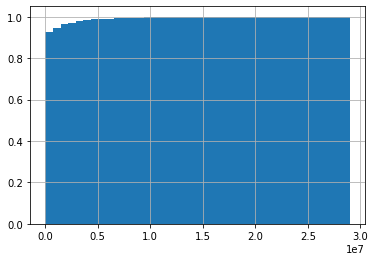

In [175]:
df2['balance'].hist(cumulative=True, density=1, bins=40)

In [13]:
dfz = df.groupby('address').apply(lambda x: pd.Series(dict(
    total_votes = sum(x['balance']),
    voted_y = sum(x[x['Vote']=='Yes']['balance']),
    voted_n = sum(x[x['Vote']=='No']['balance']),
    voted_y_count = np.count_nonzero(x[x['Vote']=='Yes']['balance']),
    voted_n_count = np.count_nonzero(x[x['Vote']=='No']['balance']),
    funded_y = sum(x[x['Vote']=='Yes']['is_funded']),
    funded_n = sum(x[x['Vote']=='No']['is_funded']),
    is_whale = max(x['is_whale'])
))).reset_index()

dfz.head()

,address,total_votes,voted_y,voted_n,voted_y_count,voted_n_count,funded_y,funded_n,is_whale
0,0x00100aed252E58b02A4Ee9432e09C5A269e8840A,810000.000000,351000.000000,459000.00000,13,17,7,2,False
1,0x006D0f31A00E1f9c017Ab039E9d0BA699433A28c,132207.356501,132207.356501,0.00000,2,0,1,0,False
2,0x008ed443F31a4b3aEe02fbFe61c7572dDaf3A679,39607.394400,39607.394400,0.00000,36,0,26,0,False
3,0x009Ec7D76feBECAbd5c73CB13f6d0FB83e45D450,181944.537199,81875.041740,100069.49546,9,11,6,1,False
4,0x01199c7c4d490FA953Ed5E452a2C7EbF43fef48B,0.010261,0.010261,0.00000,1,0,0,0,False


In [14]:
dfz['fraction_y'] = dfz['voted_y_count'] / (dfz['voted_y_count'] + dfz['voted_n_count'])
dfz['fraction_success_y'] = dfz['funded_y'] / dfz['voted_y_count']
dfz['fraction_success_n'] = dfz['funded_n'] / dfz['voted_n_count']

In [15]:
dfz.describe()

,total_votes,voted_y,voted_n,voted_y_count,voted_n_count,funded_y,funded_n,fraction_y,fraction_success_y,fraction_success_n
count,3.960000e+02,3.960000e+02,3.960000e+02,396.000000,396.000000,396.000000,396.000000,396.000000,392.000000,87.000000
mean,6.641776e+05,4.151343e+05,2.490433e+05,6.398990,1.212121,4.623737,0.292929,0.920458,0.770920,0.298713
std,2.651842e+06,1.608597e+06,1.539421e+06,10.701823,3.543645,7.945214,1.003816,0.194989,0.308895,0.378545
min,1.026050e-02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.565394e+03,1.450773e+03,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.600000,0.000000
50%,1.442608e+04,1.355777e+04,0.000000e+00,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.111111
75%,1.387308e+05,1.094013e+05,0.000000e+00,7.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.625000
max,2.898808e+07,1.898482e+07,1.976460e+07,85.000000,28.000000,65.000000,9.000000,1.000000,1.000000,1.000000


# H1

The **vote-yes success rate** of whale addresses is **higher but similar** to non-whale

The **vote-no success rate** of whale addresses is **lower** than non-whale

In [16]:
dfz.groupby('is_whale').mean()['fraction_success_y']

is_whale
False    0.769504
True     0.804182
Name: fraction_success_y, dtype: float64

In [17]:
dfz.groupby('is_whale').mean()['fraction_success_n']

is_whale
False    0.321374
True     0.198154
Name: fraction_success_n, dtype: float64

# H2

Whales are the only voters casting a significant fraction of **No** votes (fraction < 1 below)

H2.a) Most voters are always voting yes on projects -- **true for most non-whales**

H2.b) Some voters are always voting no on projects -- **true for some whales**

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

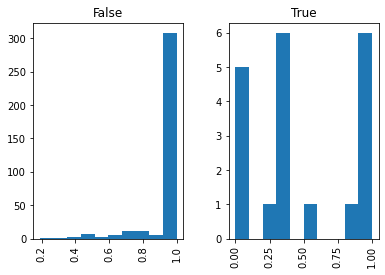

In [194]:
dfz['fraction_y'].hist(by=dfz['is_whale'])